In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [2]:
from IPython.core.pylabtools import figsize

In [3]:
from google.colab import files
uploaded = files.upload() 

Saving weatherAUS.csv to weatherAUS.csv


In [4]:

# Read dataset from csv
dataset = pd.read_csv('weatherAUS.csv',parse_dates=False,on_bad_lines='skip')
print ("Total number of rows in dataset: {}\n".format(len(dataset)))
print(dataset.head())
dataset.fillna(dataset.mean(), inplace=True)
dataset[:] = np.nan_to_num(dataset)

Total number of rows in dataset: 145460

   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0         25.0       1010.6       1007.8     17.2     24.3   
2         38.0         30.0       1007.6       1008.7     21.0     23.2   
3         45.0         16.0       1017.6       1012.8     18.1     26.5   
4         82.0         33.0       1010.8       1006.0     17.8     29.7   

   RainToday  RainTomorrow  
0        0.0          

In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM

In [6]:
tf.random.set_seed(1234)

In [7]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,16.990631,21.683390,0.224193,0.224181
std,6.365750,7.088124,8.382488,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,6.449221,6.850057,0.412350,0.412333
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,0.000000,0.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,16.800000,21.400000,0.000000,0.000000
75%,16.800000,28.200000,1.000000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [8]:
len(dataset)

145460

In [9]:
df=dataset.iloc[:2000]

In [10]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [11]:
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

Dimension of train data:  (1600, 14)
Dimension of test data:  (400, 14)


In [12]:
X_train = train_dataset.drop('MaxTemp', axis = 1)
y_train = train_dataset.loc[:,['MaxTemp']]

X_test = test_dataset.drop('MaxTemp', axis = 1)
y_test = test_dataset.loc[:,['MaxTemp']]

In [13]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [14]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 1
X_test, y_test = create_dataset(test_x_norm, test_y_norm,TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm,TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (399, 1, 13)
y_train.shape:  (1599, 1)
X_test.shape:  (399, 1, 13)
y_test.shape:  (1599, 1)


In [15]:
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
model_lstm = create_model(64, LSTM)

In [16]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,validation_split = 0.2, batch_size = 32,shuffle = False, callbacks = [early_stop])
    return history
history_lstm = fit_model(model_lstm)

Epoch 1/100
40/40 [==============================] - 5s 25ms/step - loss: 0.1089 - val_loss: 0.0481
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0258
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.0132
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0096
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0088
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0084
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0079
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 10/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 11

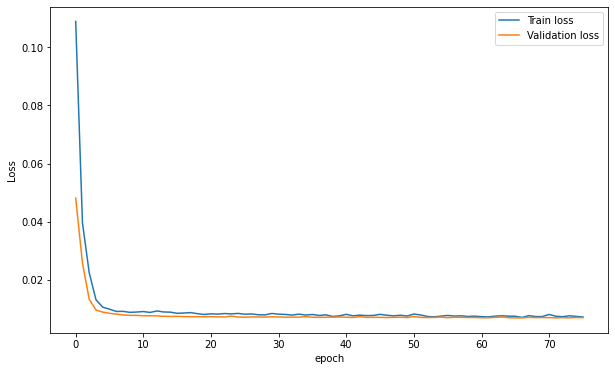

In [17]:
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_lstm)

In [18]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [19]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction
prediction_lstm = prediction(model_lstm)

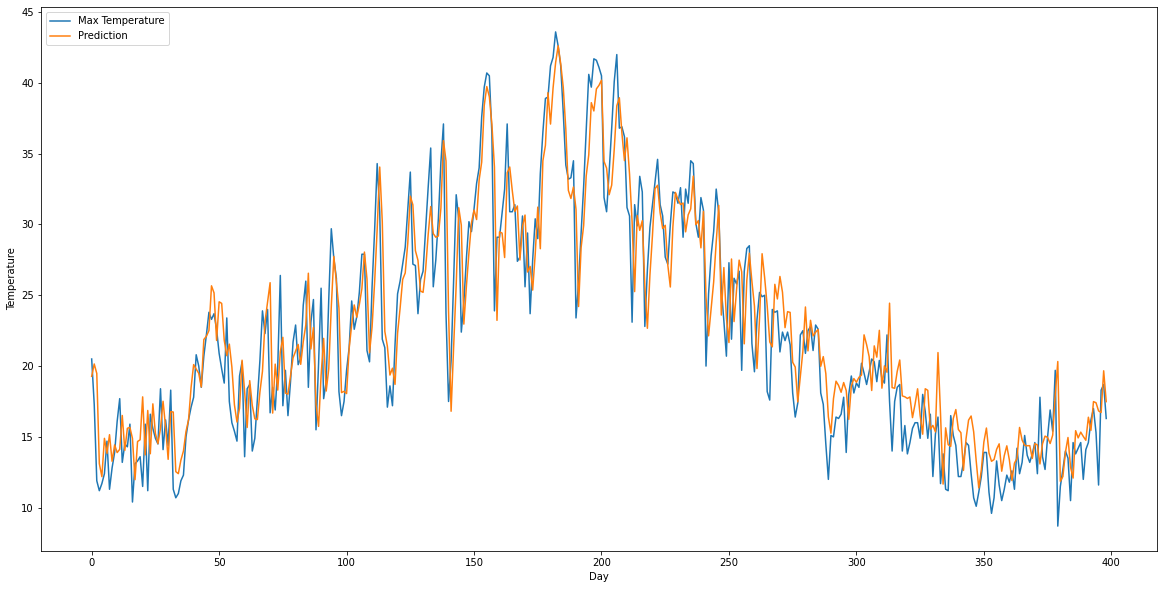

In [20]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(20, 10))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Max Temperature')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Day')
    plt.ylabel('Temperature')
plot_future(prediction_lstm, y_test)

In [21]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))

In [22]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 2.3711
Root Mean Square Error: 3.0221


In [23]:
def create_datasetf (X, time_steps = 1):
    Xs = []
    for i in range(1):
        v = X[i:i+time_steps, :]
        Xs.append(v)
    return np.array(Xs)

In [24]:
def predictionn(MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow):
    arr = np.array([MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow])
    arr=arr.reshape(1,-1)
    arr = input_scaler.transform(arr)
    TIME_STEPS = 1
    arr_test = create_datasetf(arr, TIME_STEPS)
    predictionn = model_lstm.predict(arr_test)
    predictionn = scaler_y.inverse_transform(predictionn)
    return predictionn

In [25]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 27.3 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 2.0 MB 55.8 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 253 kB 61.7 MB/s 
     |████████████████████████████████| 212 kB 54.6 MB/s 
     |████████████████████████████████| 1.1 MB 52.0 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 271 kB 63.1 MB/s 
     |████████████████████████████████| 144 kB 59.5 MB/s 
     |████████████████████████████████| 11.1 MB 50.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 856

In [26]:
import gradio as gr

In [ ]:

demo = gr.Interface(
    fn=predictionn,
    inputs=["number", "number", "number","number","number","number","number","number","number","number","number","number","number"],
    outputs=["number"],
    title="Australia LSTM Temperature Prediction"
)
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://42513.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


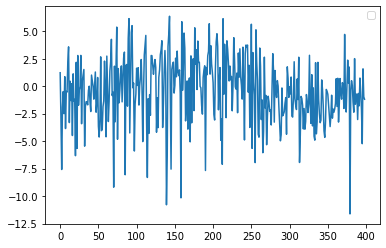

In [28]:
residuals=y_test-prediction_lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
plt.xlabel="Day"
plt.legend("","")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-20c95601cea2>", line 3, in <module>
    plt.xlabel("Y_test")
TypeError: 'str' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", 

TypeError: ignored

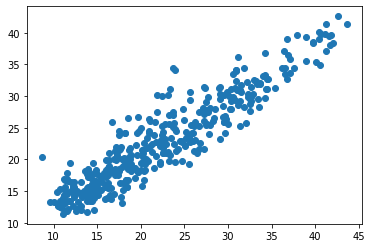

In [29]:

plt.scatter(y_test,prediction_lstm)
plt.xlabel("Y_test")
plt.ylabel("predicted")

plt.show() 